# Load dataset

In [1]:
from keras.datasets import cifar10
from keras.utils import to_categorical

In [2]:
# load dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

170498071/170498071 [==============================] - 6s 0us/step


# Preprocess the pixels

In [4]:
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

# Define model

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import Adam

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Fit and evaluate the model

In [11]:
# fit model
history = model.fit(trainX, trainY, epochs=10, batch_size=128, validation_data=(testX, testY), verbose=1)
# evaluate model
error, acc = model.evaluate(testX, testY, verbose=0)

Epoch 1/10
391/391 [==============================] - 99s 253ms/step - loss: 0.8880 - accuracy: 0.6945 - val_loss: 1.0055 - val_accuracy: 0.6562
Epoch 2/10
391/391 [==============================] - 78s 198ms/step - loss: 0.8136 - accuracy: 0.7184 - val_loss: 1.0665 - val_accuracy: 0.6434
Epoch 3/10
391/391 [==============================] - 77s 196ms/step - loss: 0.7490 - accuracy: 0.7409 - val_loss: 1.0285 - val_accuracy: 0.6592
Epoch 4/10
391/391 [==============================] - 75s 193ms/step - loss: 0.6920 - accuracy: 0.7580 - val_loss: 1.0575 - val_accuracy: 0.6560
Epoch 5/10
391/391 [==============================] - 73s 187ms/step - loss: 0.6454 - accuracy: 0.7725 - val_loss: 1.0005 - val_accuracy: 0.6734
Epoch 6/10
391/391 [==============================] - 75s 191ms/step - loss: 0.5976 - accuracy: 0.7938 - val_loss: 1.0748 - val_accuracy: 0.6590
Epoch 7/10
391/391 [==============================] - 73s 188ms/step - loss: 0.5463 - accuracy: 0.8085 - val_loss: 1.0778 - val_ac

# Plot the results

In [12]:
from matplotlib import pyplot as plt

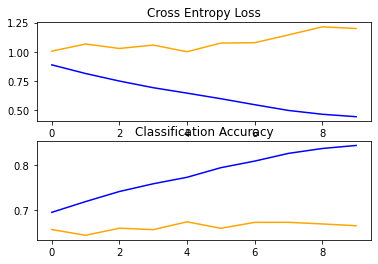

In [13]:
# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [20]:
print('Test accuracy= %.3f' % (acc * 100.0))

Test accuracy= 66.470
